

***In this project, the dataset named Telco Customer Churn from Kaggle was used. Each row represents a customer, each column contains the customer’s attributes. This dataset contains 21 columns (variables) and 7043 rows (customers) with information such as customerID, gender, Phone Service, and Internet Service.***

***Analysis of data columns to identify independent and dependent variables***

***X is the independent variables — the variables we are using to make predictions***


***y is dependent variable — variable we are trying to predict or estimate***

***Churn — output value, predict variable***

# So, first of all we imported the required libraries needed 

In [1]:
# Data processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model creation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

### Next, after installing the  the required packages ,Data Reading. Let’s import the dataset.

- The first step of the analysis consists of reading and storing the data in a Pandas data frame using the pandas.read_csv function we loaded the dataframe, by reading the csv file provided 

In [3]:
df = pd.read_csv("telco_customer_churn.csv")

### After reading the csv as a df, we went ahead to check the first 4 rows  from the top . This returned the first 5 rows with the names of cthe columns in addition to the specified rows

In [4]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


### Next, we checked the shape of our dataframe uisng .shape

In [9]:
print(df.shape)

(7043, 21)


- We found out that the shape of our dataframe is (7043, 21), this means that the datafrem has 7043 rows and 21 columns

### Show All of The Columns

In [11]:
display(df.columns.values)

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

- So, here we can see all of the columns name and immediately we can see some interesting columns like customer Id, gender, phone service, internet service, contract, monthly charges, tenure and obviously churn

### Exploratory Data Analysis and Data Cleaning (Understanding the Dataset)
- Before starting any data analysis, it's crucial to
understand the dataset you're working with
- This includes understanding the structure of the data,
the meaning of each column, and any potential issues
or challenges

### Next we checked for the info for our df so as we can get a coincise summary of the dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- After checking the info of our dataframe, we have 7043 entries and 21 columns. Also, df.info() gave us the nammes of our columns that we have in the df and the data types of each columns. Also,  the number of non null values wa disp;ayed for eah column as shown.
- So our datfarme has three datatypes( floats for 1 column which si monthly charges, int 64 for two columns which include seniour citizena  and tenure and the  other 18 columns are have object datatype)
- Apparently, there are no null values on the data set; however, we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type.

In [13]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- So the Total charges columns is now numeric ( a float datataype)

### Next we checked for null values  in our datafarme

In [17]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Null observations of the _TotalCharges_ column

In [18]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- We can now observe that the column TotalCharges has 11 missing values.

In [20]:
df['TotalCharges'].isnull().sum()

11

- so we replace the missing values with average. In this case, using average  which is a good strategy.

In [21]:
# Calculate the average of non-null values in the 'TotalCharges' column
average_total_charges = df['TotalCharges'].mean()

# Replace missing values with the average
df['TotalCharges'].fillna(average_total_charges, inplace=True)

In [23]:
df['TotalCharges'].isnull().sum()

0

- so as we can see we have fixed the missing values on the Totalcharges column

### So we checked again for the null values to see if every column is now well fixed

In [24]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- After running the cell we can see the columns name in the left and number for missing values for each column on the right and right every single value is zero so this tells us that this data has no missing values.

In [25]:
df.notnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7039,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7040,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7041,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


### Next step  involved checking for the description of our dataset in the df using _decribe()_

In [26]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- From the summmary we can see that the decribe function did apply on the  four columns since they  are numerical.
- So lets us get insights from this 
- The dataset consists of 7043 entries. Regarding the 'SeniorCitizen' column, it indicates whether a customer is a senior citizen, with a mean value of approximately 0.16 and a standard deviation of about 0.37. This suggests that senior citizens make up a relatively small portion of the customer base, with a maximum value of 1 indicating that some customers are indeed senior citizens.

- Moving to the 'tenure' column, which represents the number of months a customer has stayed with the service, the mean tenure is approximately 32.37 months, with a standard deviation of around 24.56. This indicates a wide range of tenures among customers, ranging from 0 months to a maximum of 72 months, with a median (50th percentile) tenure of 29 months.

- Regarding 'MonthlyCharges', which denotes the monthly service charges for customers, the mean monthly charge is approximately $64.76, with a standard deviation of about $30.09. The charges vary considerably among customers, with a minimum of $18.25 and a maximum of $118.75. The median monthly charge is $70.35, indicating that half of the customers pay more than this amount monthly.

- 'TotalCharges' represents the total charges incurred by each customer. The mean total charge is approximately $2283.30, with a standard deviation of around $2265.00. The total charges range from $18.80 to $8684.80, with a median total charge of $1400.55. This suggests significant variability in the total charges incurred by customers, with some customers having substantially higher charges than others.








### Next we checked to see if we have any duplicated values in out dataframe

In [27]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


- As we can see above, we have no duplicated rows in our dataframe

In [30]:
df = df.drop_duplicates()

- **Checking _outliers_ in numerical columns**

In [31]:
num_cols = df.select_dtypes(include = ["int", "float"])
print(num_cols.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


#### Visualisation of the numerical columns distribution

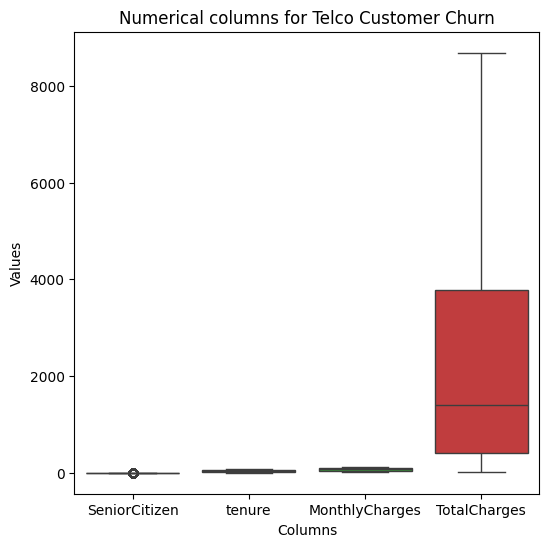

In [32]:
plt.figure(figsize=(6, 6))
sns.boxplot(num_cols)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Numerical columns for Telco Customer Churn")
plt.show()

In [35]:
print("Unique values for Senior Citizen Column: ", df['SeniorCitizen'].unique())

Unique values for Senior Citizen Column:  [0 1]


- From the unique values of the seniorCitizen column, we are able to tell that there exist no outlier in the column, as all values are either [0, 1].

### Checking correlation of the columns.

In [38]:
num_cols.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


### Heatmap for the correlation matrix

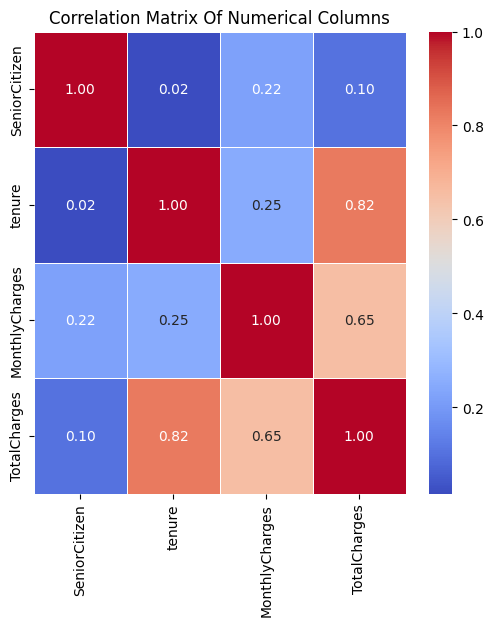

In [42]:
# Plotting a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Of Numerical Columns")
plt.show()

- From previous analysis of our dataframe, some columns have only two catgorical values(yes or no), which we will conert to 1 and 0 respectively.

In [45]:
# Function to encode categorical columns.
def encode_column(df_to, col_data):
    '''
        encode_column - function encodes all the values of a column to 1 or 0, 1 - yes, 0 - no.

        Args:
            col_dat: the column data
        Return:
            new column values.
    '''
    encode = {'yes': 1, "no": 0}
    df_to.loc[df_to[col_data].isna(), col_data] = -1
    
    new_col = df_to.replace(encode)
    df_to[col_data + '_encoded'] = new_col
    
    return df_to

In [ ]:
for col in df.columns.to_list():
    df[col] = encode_column(df, df[col])